# Kaggle Competition Info
In this competition, you’ll develop an NLP model driven by ML to accurately predict students’ potential math misconceptions based on student explanations in open-ended responses. This solution will suggest candidate misconceptions for these explanations, making it easier for teachers to identify and address students’ incorrect thinking, which is critical to improving student math learning.  
## Offical Link
https://www.kaggle.com/competitions/map-charting-student-math-misunderstandings 

# Recommand install package first at Add-ons --> Install Dependence

```python
!pip install -U bitsandbytes==0.47.0
!pip install -U peft==0.17.0
!pip install -U trl==0.21.0
!pip install -U accelerate==1.10.0
!pip install transformers==4.55.0
!pip install langchain==0.3.27
!pip install -U langchain-core==0.3.74
!pip install langchain-text-splitters==0.3.9
!pip install langchain-community==0.3.27
!pip install -U deepeval==3.3.9
```

In [1]:
import kagglehub

DEBUG = True

if DEBUG is True:
    !pip install git+https://github.com/huggingface/transformers.git  # install transformer from source
    # !pip install --upgrade torch datasets accelerate peft bitsandbytes trl
    # !pip install --upgrade accelerate peft bitsandbytes trl
    !pip install --upgrade datasets accelerate  # add datasets, accelerate , bitsndbytes
    # !pip install -U bitsandbytes==0.47.0
    # !pip install -U peft==0.17.0
    # !pip install -U trl==0.21.0
    !pip install --upgrade peft trl
    # !pip install -U accelerate==1.10.0
    # !pip install transformers==4.55.0
    !pip install langchain==0.3.27
    !pip install -U langchain-core==0.3.74
    !pip install langchain-text-splitters==0.3.9
    !pip install langchain-community==0.3.27
    !pip install -U deepeval==3.3.9
    !pip install protobuf==4.25.8 #4.49.0     # 6.30.2      #==3.20.3 #4.49.0
    !pip install triton==3.0.0   # avoid load LLM error
    !pip install --upgrade bitsandbytes

else:
    # package = kagglehub.package_import("/johnsonhk88/universal-llm-install-package2")
    installDir = "/kaggle/input/universal-llm-install-package2/V7" #"/kaggle/input/universal-llm-install-package2/V7"
    # installDir2 ="/kaggle/input/deepeval-open-source-llm-evaluation-framework"
    !pip install transformers --no-index --no-deps --find-links=file://{installDir}/transformers-4.45.2-py3-none-any.whl
    !pip install -U accelerate --no-index --no-deps --find-links=file://{installDir}/accelerate-1.0.1-py3-none-any.whl
    !pip install -U trl --no-index --no-deps --find-links=file://{installDir}/trl-0.11.4-py3-none-any.whl
    !pip install -U peft --no-index --no-deps --find-links=file://{installDir}/peft-0.14.0-py3-none-any.whl
    !pip install  bitsandbytes --no-index --no-deps --find-links=file://{installDir}/bitsandbytes-0.45.0-py3-none-manylinux_2_24_x86_64.whl
    
    !pip install -U langchain --no-index  --no-deps --find-links=file://{installDir}/langchain-0.3.3-py3-none-any.whl
    !pip install -U langchain_core --no-index  --no-deps --find-links=file://{installDir}/langchain_core-0.3.12-py3-none-any.whl
    !pip install -U langchain_text_splitters  --no-index  --no-deps  --find-links=file://{installDir}/langchain_text_splitters-0.3.0-py3-none-any.whl
    !pip install -U langchain_community  --no-index  --no-deps   --find-link=file://{installDir}/langchain_community-0.3.2-py3-none-any.whl
    
    # !pip install -U vllm   --no-index --find-links=file:///kaggle/input/vllm-inference/



  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-igk7qqh0
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-igk7qqh0
  Resolved https://github.com/huggingface/transformers.git to commit e68146fbe7052a6dc8456f48edabe705dc1f7381
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 9.7 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.56.0.dev0-py3-none-any.whl size=12586691 sha256=4cb7bdb103d14715dfca7cb117e7b6f37fd93174dc9a1098c53f69372c332569
  Stored in directory: /tmp/pip-ephem-wheel-cache-cynbsbui/wheels/32/4b/78/f195c684dd3a9ed21f3b39fe8f85b48df7918581b6437be143
Successfully built transformers
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.33.1
    Uninstalling huggingface-h

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import os, time , gc , json
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn
import transformers




In [3]:
import torch
from sklearn.model_selection import train_test_split

from transformers import (AutoTokenizer, 
                          BitsAndBytesConfig, 
                          AutoModelForCausalLM,
                          AutoModelForSequenceClassification,
                         TrainingArguments)

from datasets import Dataset, DatasetDict, load_dataset


# Fine tuning 
from trl import SFTTrainer, SFTConfig
from peft import (LoraConfig, 
                    PeftModel, 
                    get_peft_model)
                    # prepare_model_for_kbit_training)  #prepare_model_for_int8_training deprecated 

from sklearn.metrics import (classification_report, ConfusionMatrixDisplay, log_loss,
                             f1_score, accuracy_score, precision_score, recall_score)

2025-08-26 06:07:17.138794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756188437.305400      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756188437.353112      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/map-charting-student-math-misunderstandings/sample_submission.csv
/kaggle/input/map-charting-student-math-misunderstandings/train.csv
/kaggle/input/map-charting-student-math-misunderstandings/test.csv
/kaggle/input/universal-llm-install-package2/V7/langchain_community-0.3.2-py3-none-any.whl
/kaggle/input/universal-llm-install-package2/V7/langsmith-0.1.136-py3-none-any.whl
/kaggle/input/universal-llm-install-package2/V7/bitsandbytes-0.45.0-py3-none-manylinux_2_24_x86_64.whl
/kaggle/input/universal-llm-install-package2/V7/langchain_core-0.3.12-py3-none-any.whl
/kaggle/input/universal-llm-install-package2/V7/accelerate-1.0.1-py3-none-any.whl
/kaggle/input/universal-llm-install-package2/V7/trl-0.11.4-py3-none-any.whl
/kaggle/input/universal-llm-install-package2/V7/langchain_text_splitters-0.3.0-py3-none-any.whl
/kaggle/input/universal-llm-install-package2/V7/huggingface_hub-0.26.0-py3-none-any.whl
/kaggle/input/universal-llm-install-package2/V7/langchain-0.3.3-py3-none-any.wh

In [5]:
class CFG:
    DeepEval = False#True  # True must enable "Internet on" 

     # LLM Config 
    reportTo ="none"
    topK = 40
    topP = 1.0
    temperature = 0.1 #0.5
    repetition_penalty = 1.05 # 1.1
    maxOutToken = 300 #150#180 #100
    

    # Fine tuning Config
    maxLength = 256 #1024 
    reportTo = "none"
    maxEpoch = 2
    evalSteps = 20 
    learning_rate = 2e-4 #1e-4
    per_device_train_batch_size = 6 #2 #8#6 #8
    per_device_eval_batch_size = 6 #2 #8#6 #8  

    warmup_steps= 5# 10
    gradient_accumulation_steps =2  #10
    maxTrainStep = 100 #50#100 #250 #150 
    valDatasetSize = 20 #10 #50 #500 # set validiation data size

    #model
    model1 = "/kaggle/input/qwen-3/transformers/8b/1"

    #
    frac = 0.5 #0.3 #0.3 #0.3 #0.1 # Random resample data(reduce train data size )
    

    trainFile = "/kaggle/input/map-charting-student-math-misunderstandings/train.csv"
    testFile  = "/kaggle/input/map-charting-student-math-misunderstandings/test.csv"
    sampleFile = "/kaggle/input/map-charting-student-math-misunderstandings/sample_submission.csv"
    

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [7]:
torch.cuda.is_bf16_supported()

True

In [8]:
def clearMemory():
    for _ in range(5):
        torch.cuda.empty_cache()
        gc.collect()
        time.sleep(0.3)

In [9]:
clearMemory()

In [10]:
trainDF = pd.read_csv(CFG.trainFile)
trainDF.head()

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,NaN
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,NaN
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,NaN
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,NaN
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,NaN


In [11]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36696 entries, 0 to 36695
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              36696 non-null  int64 
 1   QuestionId          36696 non-null  int64 
 2   QuestionText        36696 non-null  object
 3   MC_Answer           36696 non-null  object
 4   StudentExplanation  36696 non-null  object
 5   Category            36696 non-null  object
 6   Misconception       9860 non-null   object
dtypes: int64(2), object(5)
memory usage: 2.0+ MB


In [12]:
trainDF.describe()

,row_id,QuestionId
count,36696.000000,36696.000000
mean,18347.500000,46356.825104
std,10593.367076,25617.723392
min,0.000000,31772.000000
25%,9173.750000,31777.000000
50%,18347.500000,32833.000000
75%,27521.250000,33474.000000
max,36695.000000,109465.000000


In [13]:
testDF = pd.read_csv(CFG.testFile)
testDF

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation
0,36696,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"I think that 1/3 is the answer, as it's the si..."
1,36697,31772,What fraction of the shape is not shaded? Give...,\( \frac{3}{6} \),i think this answer is because 3 triangles are...
2,36698,32835,Which number is the greatest?,\( 6.2 \),because the 2 makes it higher than the others.


In [14]:
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              3 non-null      int64 
 1   QuestionId          3 non-null      int64 
 2   QuestionText        3 non-null      object
 3   MC_Answer           3 non-null      object
 4   StudentExplanation  3 non-null      object
dtypes: int64(2), object(3)
memory usage: 252.0+ bytes


In [15]:
testDF.isnull().sum()

row_id                0
QuestionId            0
QuestionText          0
MC_Answer             0
StudentExplanation    0
dtype: int64

In [16]:
# Nan and Null check
trainDF.isnull().sum()


row_id                    0
QuestionId                0
QuestionText              0
MC_Answer                 0
StudentExplanation        0
Category                  0
Misconception         26836
dtype: int64

In [17]:
sample = pd.read_csv(CFG.sampleFile)
sample

,row_id,Category:Misconception
0,36696,True_Correct:NA False_Neither:NA False_Misconc...
1,36697,True_Correct:NA False_Neither:NA False_Misconc...
2,36698,True_Correct:NA False_Neither:NA False_Misconc...


In [18]:
sample.columns

Index(['row_id', 'Category:Misconception'], dtype='object')

## EDA
### Print Columns Values

In [19]:
def printAllcolumnsValue(df, showAll=True):
    """
    Print DataFrame columns values
    """
    # loop column
    for col in df.columns:
        if showAll is True:
            print(f"{col} : {df[col].unique()}") # print unique value
        else: # only print caterogy column
            if df[col].dtype == "object":
                print(f"{col} : {df[col].unique()}") # print unique value

def printSerieUnquieValue(df):
    """
    print data serie value
    """
    print(f" {df.unique()}")

In [20]:
printAllcolumnsValue(trainDF, showAll=True)

row_id : [    0     1     2 ... 36693 36694 36695]
QuestionId : [ 31772  31774  31777  31778  32829  32833  32835  33471  33472  33474
  76870  89443  91695 104665 109465]
QuestionText : ['What fraction of the shape is not shaded? Give your answer in its simplest form. [Image: A triangle split into 9 equal smaller triangles. 6 of them are shaded.]'
 'Calculate \\( \\frac{1}{2} \\div 6 \\)'
 'A box contains \\( 120 \\) counters. The counters are red or blue. \\( \\frac{3}{5} \\) of the counters are red.\nHow many red counters are there?'
 '\\( \\frac{A}{10}=\\frac{9}{15} \\) What is the value of \\( A \\) ?'
 '\\( 2 y=24 \\) What is the value of \\( y \\) ?'
 'Calculate \\( \\frac{2}{3} \\times 5 \\)'
 'Which number is the greatest?'
 'A bag contains \\( 24 \\) yellow and green balls. \\( \\frac{3}{8} \\) of the balls are yellow. How many of the balls are green?'
 '\\( \\frac{1}{3}+\\frac{2}{5}= \\)'
 'Sally has \\( \\frac{2}{3} \\) of a whole cake in the fridge. Robert eats \\( \\frac{

In [21]:
featureCols = trainDF.columns.tolist()
featureCols

['row_id',
 'QuestionId',
 'QuestionText',
 'MC_Answer',
 'StudentExplanation',
 'Category',
 'Misconception']

In [22]:
# clean data
trainDF["Misconception"]= trainDF["Misconception"].fillna("NA") # fill NaN to NA
trainDF["Misconception"].isnull().sum() # check Null 

0

#### combine into target columns

In [23]:

trainDF['target'] = trainDF["Category"]+":"+trainDF["Misconception"]
trainDF

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception,target
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,NA,True_Correct:NA
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,NA,True_Correct:NA
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,NA,True_Neither:NA
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,NA,True_Neither:NA
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,NA,True_Correct:NA
...,...,...,...,...,...,...,...,...
36691,36691,109465,The probability of an event occurring is \( 0....,Unlikely,very unlikely.,False_Neither,NA,False_Neither:NA
36692,36692,109465,The probability of an event occurring is \( 0....,Unlikely,yea pretty much unlikely from what it seems.,False_Neither,NA,False_Neither:NA
36693,36693,109465,The probability of an event occurring is \( 0....,Unlikely,yeah pretty unlikelyy from what it seems.,False_Neither,NA,False_Neither:NA
36694,36694,109465,The probability of an event occurring is \( 0....,Unlikely,you have 9 other numbers to get.,False_Neither,NA,False_Neither:NA


### Create Label

In [24]:
le = LabelEncoder()
trainDF["label"]= le.fit_transform(trainDF['target']) # encode caterogy into label

In [25]:
trainDF

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception,target,label
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,NA,True_Correct:NA,37
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,NA,True_Correct:NA,37
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,NA,True_Neither:NA,64
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,NA,True_Neither:NA,64
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,NA,True_Correct:NA,37
...,...,...,...,...,...,...,...,...,...
36691,36691,109465,The probability of an event occurring is \( 0....,Unlikely,very unlikely.,False_Neither,NA,False_Neither:NA,36
36692,36692,109465,The probability of an event occurring is \( 0....,Unlikely,yea pretty much unlikely from what it seems.,False_Neither,NA,False_Neither:NA,36
36693,36693,109465,The probability of an event occurring is \( 0....,Unlikely,yeah pretty unlikelyy from what it seems.,False_Neither,NA,False_Neither:NA,36
36694,36694,109465,The probability of an event occurring is \( 0....,Unlikely,you have 9 other numbers to get.,False_Neither,NA,False_Neither:NA,36


In [26]:
# print all unique t
printAllcolumnsValue(trainDF, showAll=True)

row_id : [    0     1     2 ... 36693 36694 36695]
QuestionId : [ 31772  31774  31777  31778  32829  32833  32835  33471  33472  33474
  76870  89443  91695 104665 109465]
QuestionText : ['What fraction of the shape is not shaded? Give your answer in its simplest form. [Image: A triangle split into 9 equal smaller triangles. 6 of them are shaded.]'
 'Calculate \\( \\frac{1}{2} \\div 6 \\)'
 'A box contains \\( 120 \\) counters. The counters are red or blue. \\( \\frac{3}{5} \\) of the counters are red.\nHow many red counters are there?'
 '\\( \\frac{A}{10}=\\frac{9}{15} \\) What is the value of \\( A \\) ?'
 '\\( 2 y=24 \\) What is the value of \\( y \\) ?'
 'Calculate \\( \\frac{2}{3} \\times 5 \\)'
 'Which number is the greatest?'
 'A bag contains \\( 24 \\) yellow and green balls. \\( \\frac{3}{8} \\) of the balls are yellow. How many of the balls are green?'
 '\\( \\frac{1}{3}+\\frac{2}{5}= \\)'
 'Sally has \\( \\frac{2}{3} \\) of a whole cake in the fridge. Robert eats \\( \\frac{

### Get Label Catergory class name

In [27]:

targetClasses = le.classes_   
targetClasses

array(['False_Correct:NA', 'False_Misconception:Adding_across',
       'False_Misconception:Adding_terms', 'False_Misconception:Additive',
       'False_Misconception:Base_rate', 'False_Misconception:Certainty',
       'False_Misconception:Definition',
       'False_Misconception:Denominator-only_change',
       'False_Misconception:Division', 'False_Misconception:Duplication',
       'False_Misconception:Firstterm', 'False_Misconception:FlipChange',
       'False_Misconception:Ignores_zeroes',
       'False_Misconception:Incomplete',
       'False_Misconception:Incorrect_equivalent_fraction_addition',
       'False_Misconception:Interior',
       'False_Misconception:Inverse_operation',
       'False_Misconception:Inversion', 'False_Misconception:Irrelevant',
       'False_Misconception:Longer_is_bigger', 'False_Misconception:Mult',
       'False_Misconception:Multiplying_by_4',
       'False_Misconception:Not_variable', 'False_Misconception:Positive',
       'False_Misconception:Scal

In [28]:
nClasses = len(targetClasses)
nClasses

65

In [29]:
print(f"Train shape: {trainDF.shape} with {nClasses} target classes")
trainDF.head()

Train shape: (36696, 9) with 65 target classes


,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception,target,label
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,NA,True_Correct:NA,37
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,NA,True_Correct:NA,37
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,NA,True_Neither:NA,64
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,NA,True_Neither:NA,64
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,NA,True_Correct:NA,37


# Feature Engineering

### Add correct answer flag

In [30]:
idx = trainDF.apply(lambda row: row["Category"].split("_")[0] , axis=1) == "True" # get Category with True 
idx

0         True
1         True
2         True
3         True
4         True
         ...  
36691    False
36692    False
36693    False
36694    False
36695    False
Length: 36696, dtype: bool

In [31]:
correct = trainDF.loc[idx].copy()
correct

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception,target,label
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,NA,True_Correct:NA,37
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,NA,True_Correct:NA,37
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,NA,True_Neither:NA,64
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,NA,True_Neither:NA,64
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,NA,True_Correct:NA,37
...,...,...,...,...,...,...,...,...,...
36275,36275,109465,The probability of an event occurring is \( 0....,Likely,very close to one but not one so it cant be ce...,True_Correct,NA,True_Correct:NA,37
36276,36276,109465,The probability of an event occurring is \( 0....,Likely,very high probability however it's not certain,True_Neither,NA,True_Neither:NA,64
36277,36277,109465,The probability of an event occurring is \( 0....,Likely,we should use likely because we dont know for ...,True_Neither,NA,True_Neither:NA,64
36278,36278,109465,The probability of an event occurring is \( 0....,Likely,well 0.9 = 90% and the only way something can ...,True_Correct,NA,True_Correct:NA,37


In [32]:
# group MC anwser with count 
correct['c'] = correct.groupby(['QuestionId','MC_Answer']).MC_Answer.transform('count')
correct = correct.sort_values('c',ascending=False) # sort value 
correct

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception,target,label,c
61,61,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),3 goes into 9 three times which makes it one t...,True_Correct,NA,True_Correct:NA,37,2348
7,7,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1/3 because 3/9 simplified divided by 3 would ...,True_Correct,NA,True_Correct:NA,37,2348
6,6,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1/3 and 3/9 are not shaded but they are equal ...,True_Correct,NA,True_Correct:NA,37,2348
5,5,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 third because 6 over 9 is 2 thirds and 1 thi...,True_Correct,NA,True_Correct:NA,37,2348
60,60,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),3 from the 9 triangles are not shaded and 3/9 ...,True_Correct,NA,True_Correct:NA,37,2348
...,...,...,...,...,...,...,...,...,...,...
14338,14338,31778,\( \frac{A}{10}=\frac{9}{15} \) What is the va...,\( 9 \),It is six because they are both equal to 3over5.,True_Correct,NA,True_Correct:NA,37,12
14335,14335,31778,\( \frac{A}{10}=\frac{9}{15} \) What is the va...,\( 9 \),Il believe that is the ansewer because I calcu...,True_Neither,NA,True_Neither:NA,64,12
14321,14321,31778,\( \frac{A}{10}=\frac{9}{15} \) What is the va...,\( 9 \),I think it's C because 6/10 is the same as 9/15.,True_Correct,NA,True_Correct:NA,37,12
14280,14280,31778,\( \frac{A}{10}=\frac{9}{15} \) What is the va...,\( 9 \),"Because 10 is 2 / 3 of 15, and 2 is 6.",True_Neither,NA,True_Neither:NA,64,12


In [33]:
# Drop duplicateds ID
correct = correct.drop_duplicates(['QuestionId']) #drop dprlicate id
correct = correct[['QuestionId','MC_Answer']]
correct

,QuestionId,MC_Answer
61,31772,\( \frac{1}{3} \)
7430,31774,\( \frac{1}{12} \)
10770,31777,\( 72 \)
14266,31778,\( 6 \)
14440,32829,\( 12 \)
22004,32835,\( 6.2 \)
24278,33472,\( \frac{11}{15} \)
18135,32833,\( 3 \frac{1}{3} \)
33183,91695,\( 26 \)
30937,89443,\( -3 \)


In [34]:
# set correct flag = 1
correct["is_correct"] = 1
correct

,QuestionId,MC_Answer,is_correct
61,31772,\( \frac{1}{3} \),1
7430,31774,\( \frac{1}{12} \),1
10770,31777,\( 72 \),1
14266,31778,\( 6 \),1
14440,32829,\( 12 \),1
22004,32835,\( 6.2 \),1
24278,33472,\( \frac{11}{15} \),1
18135,32833,\( 3 \frac{1}{3} \),1
33183,91695,\( 26 \),1
30937,89443,\( -3 \),1


### Merge training data

In [35]:

trainDF = trainDF.merge(correct, on=['QuestionId','MC_Answer'], how='left')
trainDF["is_correct"] = trainDF["is_correct"].fillna(0) # fill miss data to 0

In [36]:
trainDF["is_correct"] = trainDF["is_correct"].astype(int) # change is_correct data type to int

In [37]:
trainDF

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception,target,label,is_correct
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,NA,True_Correct:NA,37,1
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,NA,True_Correct:NA,37,1
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,NA,True_Neither:NA,64,1
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,NA,True_Neither:NA,64,1
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,NA,True_Correct:NA,37,1
...,...,...,...,...,...,...,...,...,...,...
36691,36691,109465,The probability of an event occurring is \( 0....,Unlikely,very unlikely.,False_Neither,NA,False_Neither:NA,36,0
36692,36692,109465,The probability of an event occurring is \( 0....,Unlikely,yea pretty much unlikely from what it seems.,False_Neither,NA,False_Neither:NA,36,0
36693,36693,109465,The probability of an event occurring is \( 0....,Unlikely,yeah pretty unlikelyy from what it seems.,False_Neither,NA,False_Neither:NA,36,0
36694,36694,109465,The probability of an event occurring is \( 0....,Unlikely,you have 9 other numbers to get.,False_Neither,NA,False_Neither:NA,36,0


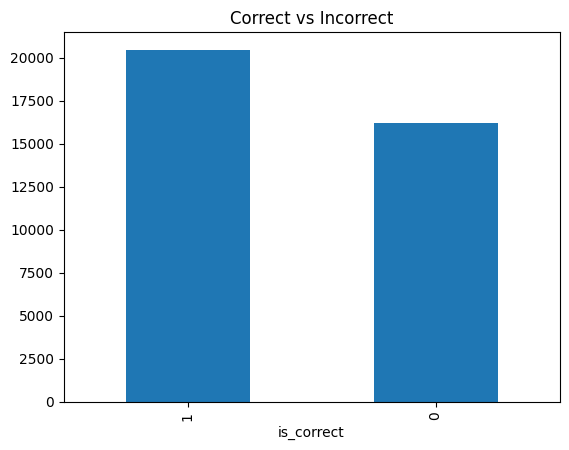

In [38]:
trainDF["is_correct"].value_counts().plot(kind="bar", title="Correct vs Incorrect");

## Merge into Test /Submit Data

In [39]:
testDF = testDF.merge(correct, on=['QuestionId','MC_Answer'], how='left')
testDF["is_correct"] = testDF["is_correct"].fillna(0)  # fill Na to 0


In [40]:
testDF["is_correct"] = testDF["is_correct"].astype(int)
testDF

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,is_correct
0,36696,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"I think that 1/3 is the answer, as it's the si...",1
1,36697,31772,What fraction of the shape is not shaded? Give...,\( \frac{3}{6} \),i think this answer is because 3 triangles are...,0
2,36698,32835,Which number is the greatest?,\( 6.2 \),because the 2 makes it higher than the others.,1


## Get Answer choices 

In [41]:
from IPython.display import display, Math, Latex

In [42]:
temp = trainDF.groupby(["QuestionId", "MC_Answer"]).size().reset_index(name="count")
temp

,QuestionId,MC_Answer,count
0,31772,\( \frac{1}{3} \),2348
1,31772,\( \frac{3}{6} \),412
2,31772,\( \frac{3}{8} \),118
3,31772,\( \frac{3}{9} \),1979
4,31774,\( 3 \),659
5,31774,\( \frac{1}{12} \),1918
6,31774,\( \frac{1}{3} \),251
7,31774,\( \frac{6}{2} \),287
8,31777,\( 24 \),255
9,31777,\( 48 \),406


In [43]:
# add Ranking
temp["rank"] = temp.groupby("QuestionId")['count'].rank(method='dense', ascending=False).astype(int) - 1
temp

,QuestionId,MC_Answer,count,rank
0,31772,\( \frac{1}{3} \),2348,0
1,31772,\( \frac{3}{6} \),412,2
2,31772,\( \frac{3}{8} \),118,3
3,31772,\( \frac{3}{9} \),1979,1
4,31774,\( 3 \),659,1
5,31774,\( \frac{1}{12} \),1918,0
6,31774,\( \frac{1}{3} \),251,3
7,31774,\( \frac{6}{2} \),287,2
8,31777,\( 24 \),255,3
9,31777,\( 48 \),406,1


In [44]:
temp = temp.drop('count',axis=1)
temp = temp.sort_values(['QuestionId','rank'])
temp

,QuestionId,MC_Answer,rank
0,31772,\( \frac{1}{3} \),0
3,31772,\( \frac{3}{9} \),1
1,31772,\( \frac{3}{6} \),2
2,31772,\( \frac{3}{8} \),3
5,31774,\( \frac{1}{12} \),0
4,31774,\( 3 \),1
7,31774,\( \frac{6}{2} \),2
6,31774,\( \frac{1}{3} \),3
11,31777,\( 72 \),0
9,31777,\( 48 \),1


In [45]:
Qid = temp["QuestionId"].unique() # get unique questionid
for q in Qid:
    question = trainDF.loc[trainDF.QuestionId==q].iloc[0]["QuestionText"] # get Question Text for specific QuestionId
    choices = temp.loc[temp["QuestionId"] ==q]["MC_Answer"].values #
    labels="ABCD" # define labels name
    choiceStr = " ".join([f"({labels[i]}) {choice}" for  i, choice in enumerate(choices)])
    print()
    display(Latex(f"Question Id: {q}: {question}"))
    display(Latex(f"MC Answer: {choiceStr}\n\r"))
    
    # print(f"question: {question}, choices: {choices}  \n\r")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [46]:
len(Qid)

15

In [47]:
clearMemory()

In [48]:
# !pip uninstall protobuf
# !pip install protobuf==3.20.3

## LLM inital

In [49]:
bnbConfig = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.bfloat16,
            bnb_4bit_use_double_quant=True ) # Activate netsed quantization for 4bit base 

In [50]:
# !pip install triton==3.4.0
# !pip install triton==3.0.0
# !pip install protobuf==6.30.2

### Load LLM Model and Tokenizer

In [51]:
clearMemory()

In [52]:
#  if device.type == "cuda":
#     model =  AutoModelForCausalLM.from_pretrained(
#         CFG.model1,
#         quantization_config = bnbConfig, 
#         device_map="auto",
#         trust_remote_code = True)
#     tokenizer = AutoTokenizer.from_pretrained(CFG.model1)
#     tokenizer.pad_token = tokenizer.eos_token
# else:
#     model =  AutoModelForCausalLM.from_pretrained(
#         CFG.model1,
#         torch_dtype=torch.bfloat16,
#         device_map="auto",
#         trust_remote_code = True)
#     tokenizer = AutoTokenizer.from_pretrained(CFG.model1)
#     tokenizer.pad_token = tokenizer.eos_token

if device.type == "cuda":
    model = AutoModelForSequenceClassification.from_pretrained(
        CFG.model1, #CFG.model3,
        num_labels= nClasses,
        # id2label =id2Label,
        # label2id = label2id,
        torch_dtype=torch.bfloat16,
        device_map="auto",
        quantization_config= bnbConfig,
        trust_remote_code=False,
        problem_type="single_label_classification", 
    )

else: 
     model = AutoModelForSequenceClassification.from_pretrained(
        CFG.model1, #CFG.model3,
        num_labels= nClasses,
        # id2label =id2Label,
        # label2id = label2id,
        device_map="auto",
        trust_remote_code=False,
        problem_type="single_label_classification", 
    )

tokenizer = AutoTokenizer.from_pretrained(CFG.model1)
tokenizer.pad_token = tokenizer.eos_token

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Some weights of Qwen3ForSequenceClassification were not initialized from the model checkpoint at /kaggle/input/qwen-3/transformers/8b/1 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [53]:
model

Qwen3ForSequenceClassification(
  (model): Qwen3Model(
    (embed_tokens): Embedding(151936, 4096)
    (layers): ModuleList(
      (0-35): 36 x Qwen3DecoderLayer(
        (self_attn): Qwen3Attention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (q_norm): Qwen3RMSNorm((128,), eps=1e-06)
          (k_norm): Qwen3RMSNorm((128,), eps=1e-06)
        )
        (mlp): Qwen3MLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=12288, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=12288, bias=False)
          (down_proj): Linear4bit(in_features=12288, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen3RMSNorm((4096,), eps=1

In [54]:
if CFG.DeepEval:
    from deepeval.models.base_model import DeepEvalBaseLLM
    from deepeval.test_case import LLMTestCase, LLMTestCaseParams
    from deepeval.metrics import GEval
    # from deepeval import evaluate
    from deepeval.metrics import AnswerRelevancyMetric
    # from deepeval.benchmarks import MMLU, HellaSwag, HumanEval,TruthfulQA
    # from deepeval.benchmarks.tasks import HumanEvalTask, HellaSwagTask, MMLUTask, TruthfulQATask
    # from deepeval.benchmarks.modes import TruthfulQAMode 

## Prepare Training Dataset

In [55]:
# Random Resample Dataset
trainDF = trainDF.sample(frac=1.0, replace=True)
trainDF = trainDF.reset_index(drop=True)
trainDF

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception,target,label,is_correct
0,33567,91695,Dots have been arranged in these patterns: [Im...,\( 26 \),because the formula is the number of the patte...,True_Correct,NA,True_Correct:NA,37,1
1,23649,33472,\( \frac{1}{3}+\frac{2}{5}= \),\( \frac{11}{15} \),3 times 5=15\n15 divided 3=5\n1 times 5=5\n15 ...,True_Correct,NA,True_Correct:NA,37,1
2,16899,32833,Calculate \( \frac{2}{3} \times 5 \),\( 3 \frac{1}{3} \),Because i did divide by the bottom times by,True_Neither,NA,True_Neither:NA,64,1
3,32145,89443,What number belongs in the box?\n\(\n(-8)-(-5)...,\( 3 \),c is correct because if you minus a negative i...,False_Neither,NA,False_Neither:NA,36,0
4,27526,33474,Sally has \( \frac{2}{3} \) of a whole cake in...,\( \frac{2}{3}-\frac{1}{3} \),because you are taking 1/3 away from 2/3,False_Misconception,Subtraction,False_Misconception:Subtraction,26,0
...,...,...,...,...,...,...,...,...,...,...
36691,22718,33471,A bag contains \( 24 \) yellow and green balls...,\( 15 \),i worked out 1 eighth and multiplied it by 3 t...,True_Correct,NA,True_Correct:NA,37,1
36692,35280,104665,It takes \( 3 \) people a total of \( 192 \) h...,\( 48 \) hours,i think this because if there are 4 times as m...,True_Correct,NA,True_Correct:NA,37,1
36693,14677,32829,\( 2 y=24 \) What is the value of \( y \) ?,\( 12 \),because 24 divided by 2 is 12 which is the val...,True_Correct,NA,True_Correct:NA,37,1
36694,9488,31777,A box contains \( 120 \) counters. The counter...,\( 72 \),Because it’s the only thing over a half,True_Correct,NA,True_Correct:NA,37,1


In [56]:
def generateTrainContent(row):
    x= "True"
    if not row["is_correct"]:
        x= "False"
    return (
           f"Question: {row['QuestionText']}\n"
           f"Answer: {row['MC_Answer']}\n"
           f"Correct: {x}\n"
           f"Student Explanation: {row['StudentExplanation']}"
    )

In [57]:
trainDF["LLM_Content"]= trainDF.apply(generateTrainContent, axis=1)

In [58]:
testDF["LLM_Content"]= testDF.apply(generateTrainContent, axis=1)

In [59]:
# print one of example
print(trainDF["LLM_Content"].values[0])

Question: Dots have been arranged in these patterns: [Image: Pattern 1 consists of 6 dots, Pattern 2 consists of 10 dots, Pattern 3 consists of 14 dots and Pattern 4 consists of 18 dots] How many dots would there be in Pattern \( 6 \) ?
Answer: \( 26 \)
Correct: True
Student Explanation: because the formula is the number of the pattern x 4 + 2


In [60]:
print(testDF["LLM_Content"].values[0])

Question: What fraction of the shape is not shaded? Give your answer in its simplest form. [Image: A triangle split into 9 equal smaller triangles. 6 of them are shaded.]
Answer: \( \frac{1}{3} \)
Correct: True
Student Explanation: I think that 1/3 is the answer, as it's the simplest form of 3/9.


## lenght of the LLM conntent

In [61]:
# trainDF["Length"] = trainDF["LLM_Content"].str.len()
trainDF["Length"] = [len(tokenizer.encode(t, truncation=False)) for t in trainDF["LLM_Content"]]

trainDF["Length"].describe()

count    36696.000000
mean        71.178221
std         20.722009
min         27.000000
25%         55.000000
50%         69.000000
75%         85.000000
max        322.000000
Name: Length, dtype: float64

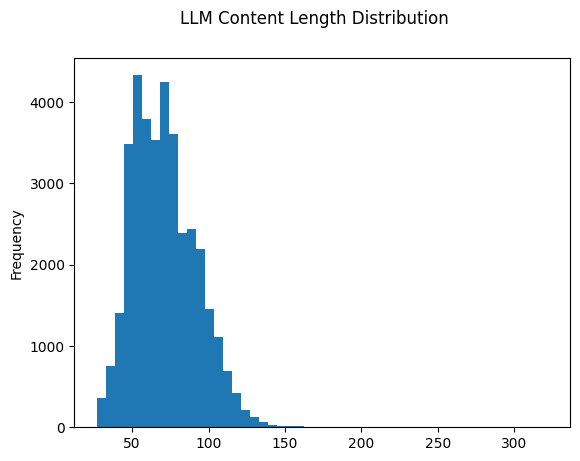

In [62]:
trainDF["Length"].plot(kind='hist', bins=50, subplots=True,sharex=True,sharey=True, title='LLM Content Length Distribution');

In [63]:
MAX_LEN = 256 #512
L = (np.array(trainDF["Length"])>MAX_LEN).sum()
print(f"There are {L} train sample(s) with more than {MAX_LEN} tokens")

There are 1 train sample(s) with more than 256 tokens


### MAX window size 256 is suitable for training 

## Create Dataset

In [64]:
len(trainDF) , round(len(trainDF) * 0.85) # check train data size

(36696, 31192)

In [65]:
totalTrainSize= len(trainDF)
totalTrainSize

36696

In [66]:
# Random Resample Dataset Reduce Totla 
# trainDF = trainDF.sample(frac=CFG.frac, replace=True)
# trainDF = trainDF.reset_index(drop=True)
# trainDF

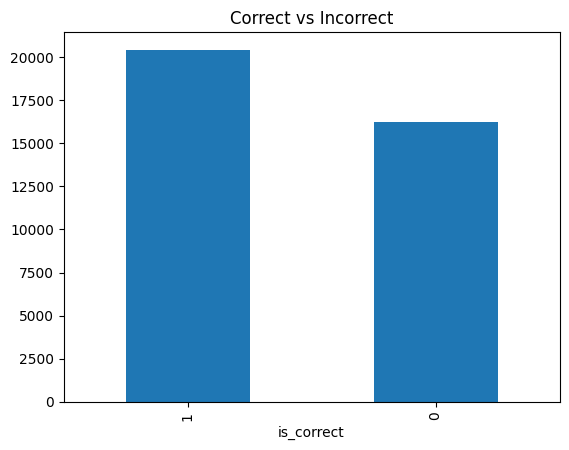

In [67]:
trainDF["is_correct"].value_counts().plot(kind="bar", title="Correct vs Incorrect");

In [68]:
totalTrainSize= len(trainDF)
totalTrainSize

36696

In [69]:
setMaxTrainData = totalTrainSize - CFG.valDatasetSize
setMaxTrainData

36676

### Create Dataset for Train/Validation

In [70]:
tempTrainDF = trainDF[:setMaxTrainData]
tempValDF = trainDF[setMaxTrainData:] 

In [71]:
tempTrainDF

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception,target,label,is_correct,LLM_Content,Length
0,33567,91695,Dots have been arranged in these patterns: [Im...,\( 26 \),because the formula is the number of the patte...,True_Correct,NA,True_Correct:NA,37,1,Question: Dots have been arranged in these pat...,97
1,23649,33472,\( \frac{1}{3}+\frac{2}{5}= \),\( \frac{11}{15} \),3 times 5=15\n15 divided 3=5\n1 times 5=5\n15 ...,True_Correct,NA,True_Correct:NA,37,1,Question: \( \frac{1}{3}+\frac{2}{5}= \)\nAnsw...,92
2,16899,32833,Calculate \( \frac{2}{3} \times 5 \),\( 3 \frac{1}{3} \),Because i did divide by the bottom times by,True_Neither,NA,True_Neither:NA,64,1,Question: Calculate \( \frac{2}{3} \times 5 \)...,47
3,32145,89443,What number belongs in the box?\n\(\n(-8)-(-5)...,\( 3 \),c is correct because if you minus a negative i...,False_Neither,NA,False_Neither:NA,36,0,Question: What number belongs in the box?\n\(\...,56
4,27526,33474,Sally has \( \frac{2}{3} \) of a whole cake in...,\( \frac{2}{3}-\frac{1}{3} \),because you are taking 1/3 away from 2/3,False_Misconception,Subtraction,False_Misconception:Subtraction,26,0,Question: Sally has \( \frac{2}{3} \) of a who...,99
...,...,...,...,...,...,...,...,...,...,...,...,...
36671,13090,31778,\( \frac{A}{10}=\frac{9}{15} \) What is the va...,\( 6 \),I have answered C because both of the sides of...,True_Correct,NA,True_Correct:NA,37,1,Question: \( \frac{A}{10}=\frac{9}{15} \) What...,134
36672,35912,109465,The probability of an event occurring is \( 0....,Likely,because it is not guaranteed to happen but pro...,True_Neither,NA,True_Neither:NA,64,1,Question: The probability of an event occurrin...,51
36673,18588,32833,Calculate \( \frac{2}{3} \times 5 \),\( \frac{10}{15} \),because 2 x 5 is 10 and 3 x 5 is 15 but you ca...,False_Misconception,Duplication,False_Misconception:Duplication,9,0,Question: Calculate \( \frac{2}{3} \times 5 \)...,67
36674,24084,33472,\( \frac{1}{3}+\frac{2}{5}= \),\( \frac{11}{15} \),d because that is the answer,True_Neither,NA,True_Neither:NA,64,1,Question: \( \frac{1}{3}+\frac{2}{5}= \)\nAnsw...,46


In [72]:
# Convert to Hugging Face Dataset for training dataset
COLS = ['LLM_Content','label']

trainDataset = Dataset.from_pandas(tempTrainDF[COLS], split="train")
valDataset = Dataset.from_pandas(tempValDF[COLS], split="test")
testDataset = Dataset.from_pandas(testDF, split="test")
subDataset = Dataset.from_pandas(sample, split="test") # submit dataset

# trainDataset = Dataset.from_pandas(tempTrainDF, split="train")
# valDataset = Dataset.from_pandas(tempValDF, split="test")
# subDataset = Dataset.from_pandas(sample, split="test") # submit dataset

In [73]:
trainDataset

Dataset({
    features: ['LLM_Content', 'label'],
    num_rows: 36676
})

In [74]:
testDataset

Dataset({
    features: ['row_id', 'QuestionId', 'QuestionText', 'MC_Answer', 'StudentExplanation', 'is_correct', 'LLM_Content'],
    num_rows: 3
})

In [75]:
subDataset

Dataset({
    features: ['row_id', 'Category:Misconception'],
    num_rows: 3
})

In [76]:
# for GPU only
!nvidia-smi  

Tue Aug 26 06:10:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P0             29W /   70W |    3333MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [77]:
del tempTrainDF 
del tempValDF

In [78]:
datasetDict = DatasetDict({
    "train" : trainDataset,
    "val"  : valDataset
    
})
datasetDict

DatasetDict({
    train: Dataset({
        features: ['LLM_Content', 'label'],
        num_rows: 36676
    })
    val: Dataset({
        features: ['LLM_Content', 'label'],
        num_rows: 20
    })
})

In [79]:
datasetDict["train"]

Dataset({
    features: ['LLM_Content', 'label'],
    num_rows: 36676
})

In [80]:
def tokenizeFunc(batch):
    return tokenizer(batch["LLM_Content"],  max_length=CFG.maxLength, padding=True, truncation=True)

In [81]:
datasetDict = datasetDict.map(tokenizeFunc, batched=True)

Map:   0%|          | 0/36676 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

In [82]:
datasetDict

DatasetDict({
    train: Dataset({
        features: ['LLM_Content', 'label', 'input_ids', 'attention_mask'],
        num_rows: 36676
    })
    val: Dataset({
        features: ['LLM_Content', 'label', 'input_ids', 'attention_mask'],
        num_rows: 20
    })
})

In [83]:
datasetDict = datasetDict.rename_column("label", "labels")  # change name to labels 

In [84]:
datasetDict

DatasetDict({
    train: Dataset({
        features: ['LLM_Content', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 36676
    })
    val: Dataset({
        features: ['LLM_Content', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 20
    })
})

In [85]:
testDict = DatasetDict({
    "test": testDataset
    
})
testDict

DatasetDict({
    test: Dataset({
        features: ['row_id', 'QuestionId', 'QuestionText', 'MC_Answer', 'StudentExplanation', 'is_correct', 'LLM_Content'],
        num_rows: 3
    })
})

In [86]:
submitDict = DatasetDict({
    "test": subDataset
    # "test": subDataset
    
})
submitDict

DatasetDict({
    test: Dataset({
        features: ['row_id', 'Category:Misconception'],
        num_rows: 3
    })
})

In [87]:
# Evaluation Metrics
# accList = []
# f1List = []
# recallList = []
# preciseList = []
# map3List = [] 
def compute_metric(eval_pred):
    logits , labels = eval_pred
    predictions = np.argmax(logits, axis=-1)  # for mult-class
    acc = (predictions == labels).mean()
    f1score  =  f1_score(labels, predictions, average='weighted', zero_division=1)
    recallScore = recall_score(labels, predictions,  average='weighted', zero_division=1)
    precision = precision_score(labels, predictions,  average='weighted', zero_division=1)
    # accList.append(acc)
    # f1List.append(f1score)
    # recallList.append(recallScore)
    # preciseList.append(precision)
    
    # for map@3
    top3_preds = np.argsort(logits, axis=-1)[:, -3:]
    match = (top3_preds == labels[:, None])

    # Compute MAP@3 manually
    map3 = 0
    for i in range(len(labels)):
        if match[i, 0]:
            map3 += 1.0
        elif match[i, 1]:
            map3 += 1.0 / 2
        elif match[i, 2]:
            map3 += 1.0 / 3
    map3Score = map3 / len(labels)
    # map3List.append(map3Score)
    
    return {"accuracy": acc , "recall":  recallScore,  "precision":precision, 'f1-score': f1score ,
             "map@3":map3Score}
    
    
    
    

## LoRA fine tuing

In [88]:
lora_config = LoraConfig(
        r=16,
        lora_alpha=32,
        task_type="SEQ_CLS",  # for Sequence Classification
        # task_type="CAUSAL_LM", # for generative task
        bias="none",
        target_modules = ["q_proj", "o_proj", "k_proj", "v_proj",
                      "gate_proj", "up_proj", "down_proj"],
        # lora_dropout= 0.05,
    )

In [89]:
model = get_peft_model(model, lora_config)

In [90]:
model.print_trainable_parameters()

trainable params: 43,913,216 || all params: 7,612,584,960 || trainable%: 0.5769


## STF Trainer Parameter

In [91]:
from trl import SFTTrainer, SFTConfig
torch_dtype = model.dtype
trainArg = SFTConfig(
    output_dir= "kaggle/working",
    max_length= CFG.maxLength,
    per_device_train_batch_size =CFG.per_device_train_batch_size,
    per_device_eval_batch_size = CFG.per_device_eval_batch_size,
    gradient_accumulation_steps = CFG.gradient_accumulation_steps,
    eval_strategy= "steps",
    save_strategy= "steps",
    warmup_steps=CFG.warmup_steps,
    max_steps = CFG.maxTrainStep, # set max train step size
    learning_rate=CFG.learning_rate,
    fp16=True if torch_dtype == torch.float16 else False,   # use float16 precision ,  # INFER WITH FP16 BECAUSE KAGGLE IS T4 GPU
    bf16=True if torch_dtype == torch.bfloat16 else False,  # use bfloat16 precision, TRAIN WITH BF16 IF LOCAL GPU IS NEWER GPU  
    # fp16=True,
    logging_steps= CFG.evalSteps,
    eval_steps = CFG.evalSteps,
    optim="paged_adamw_8bit",
    report_to = CFG.reportTo,
    do_eval=True,                # Perform evaluation at the end of training
    # weight_decay=0.01,
    metric_for_best_model="map@3",
    greater_is_better=True,

    
)

In [92]:
trainArg.bf16 

True

In [93]:
from transformers import DataCollatorWithPadding

In [94]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer= SFTTrainer(
    model=model,
    train_dataset=datasetDict["train"],
    eval_dataset = datasetDict["val"],
    args=trainArg,
    peft_config = lora_config,
    # formatting_func=formatFuct,
    data_collator = data_collator, 
    compute_metrics= compute_metric
    
    
)

/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:79: UserWarning: The PEFT config's `base_model_name_or_path` was renamed from '/kaggle/input/qwen-3/transformers/8b/1' to 'None'. Please ensure that the correct base model is loaded when loading this checkpoint.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:196: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


Truncating train dataset:   0%|          | 0/36676 [00:00<?, ? examples/s]

Truncating eval dataset:   0%|          | 0/20 [00:00<?, ? examples/s]

In [95]:
# Fix Batch size >1 , not define pad token id issues
eos_token_id=tokenizer.eos_token_id
model.config.use_cache=False
model.config.pad_token_id = tokenizer.pad_token_id

In [96]:
clearMemory() # clear memory before training

In [97]:
%%time
trainer.train()

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': None, 'pad_token_id': 151643}.


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1-score,Map@3
20,8.943900,2.964722,0.350000,0.350000,0.687143,0.252525,0.208333
40,3.642300,1.948925,0.450000,0.450000,0.775227,0.344848,0.225000
60,3.443900,1.689230,0.450000,0.450000,0.833333,0.365000,0.275000
80,3.188200,1.836900,0.500000,0.500000,0.773810,0.376923,0.216667
100,2.355000,1.441989,0.650000,0.650000,0.855556,0.570804,0.266667


CPU times: user 33min 16s, sys: 26min 7s, total: 59min 23s
Wall time: 59min 21s


TrainOutput(global_step=100, training_loss=4.314655876159668, metrics={'train_runtime': 3560.7876, 'train_samples_per_second': 0.337, 'train_steps_per_second': 0.028, 'total_flos': 9516868830830592.0, 'train_loss': 4.314655876159668})

In [98]:
model.save_pretrained("student-math-llm-Fine-tune")

In [99]:
trainHistoryDF = pd.DataFrame(trainer.state.log_history)
trainHistoryDF

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,loss,grad_norm,learning_rate,num_tokens,mean_token_accuracy,epoch,step,eval_loss,eval_accuracy,eval_recall,...,eval_runtime,eval_samples_per_second,eval_steps_per_second,eval_num_tokens,eval_mean_token_accuracy,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,8.9439,35.965714,0.000171,38138.0,0.215,0.006543,20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.006543,20,2.964722,0.35,0.35,...,15.2150,1.314,0.263,38138.0,0.2,NaN,NaN,NaN,NaN,NaN
2,3.6423,23.162527,0.000128,76191.0,0.300,0.013087,40,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.013087,40,1.948925,0.45,0.45,...,15.1939,1.316,0.263,76191.0,0.3,NaN,NaN,NaN,NaN,NaN
4,3.4439,44.061661,0.000086,114969.0,0.230,0.019630,60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,0.019630,60,1.689230,0.45,0.45,...,15.0702,1.327,0.265,114969.0,0.3,NaN,NaN,NaN,NaN,NaN
6,3.1882,30.701227,0.000044,153395.0,0.275,0.026174,80,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,0.026174,80,1.836900,0.50,0.50,...,15.2206,1.314,0.263,153395.0,0.3,NaN,NaN,NaN,NaN,NaN
8,2.3550,29.353500,0.000002,191826.0,0.265,0.032717,100,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,0.032717,100,1.441989,0.65,0.65,...,15.0703,1.327,0.265,191826.0,0.2,NaN,NaN,NaN,NaN,NaN


In [100]:
trainHistoryDF.columns

Index(['loss', 'grad_norm', 'learning_rate', 'num_tokens',
       'mean_token_accuracy', 'epoch', 'step', 'eval_loss', 'eval_accuracy',
       'eval_recall', 'eval_precision', 'eval_f1-score', 'eval_map@3',
       'eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second',
       'eval_num_tokens', 'eval_mean_token_accuracy', 'train_runtime',
       'train_samples_per_second', 'train_steps_per_second', 'total_flos',
       'train_loss'],
      dtype='object')

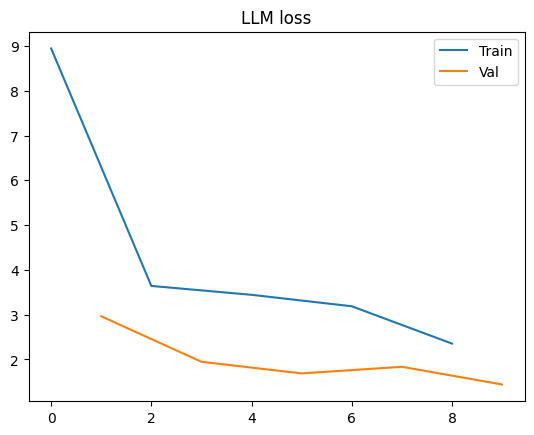

In [101]:
import matplotlib.pyplot as plt
trainloss = trainHistoryDF[~trainHistoryDF["loss"].isnull()]
valloss = trainHistoryDF[~trainHistoryDF["eval_loss"].isnull()]
plt.plot(trainloss["loss"], label="Train")
plt.plot(valloss["eval_loss"], label="Val")
plt.title("LLM loss")
plt.legend()
plt.show()

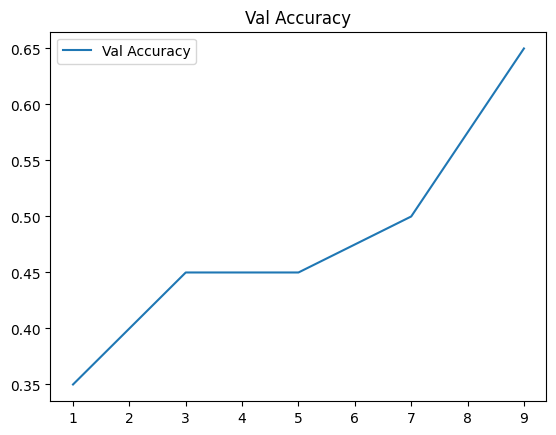

In [102]:
trainloss = trainHistoryDF[~trainHistoryDF["eval_accuracy"].isnull()]
plt.plot(trainloss["eval_accuracy"], label="Val Accuracy")
plt.title("Val Accuracy")
plt.legend()
plt.show()

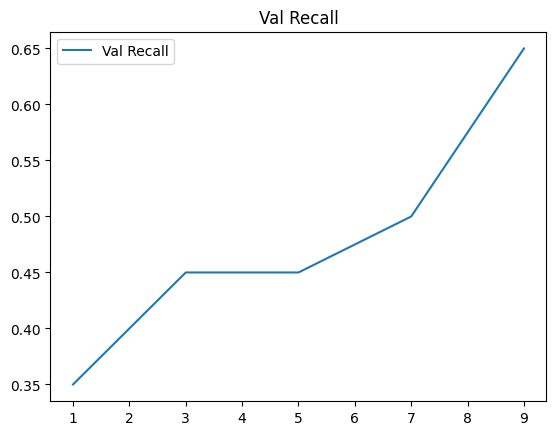

In [103]:
trainloss = trainHistoryDF[~trainHistoryDF["eval_recall"].isnull()]
plt.plot(trainloss["eval_recall"], label="Val Recall")
plt.title("Val Recall")
plt.legend()
plt.show()

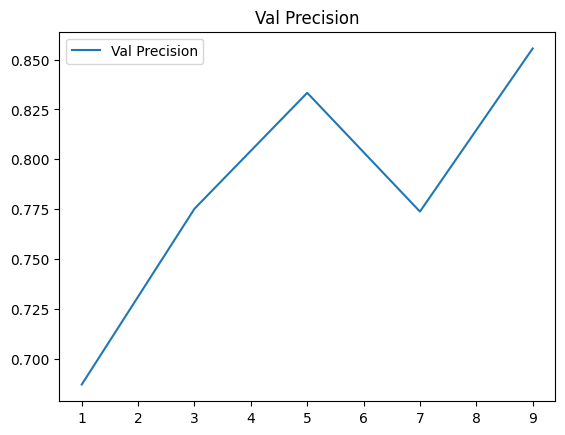

In [104]:
trainloss = trainHistoryDF[~trainHistoryDF["eval_precision"].isnull()]
plt.plot(trainloss["eval_precision"], label="Val Precision")
plt.title("Val Precision")
plt.legend()
plt.show()

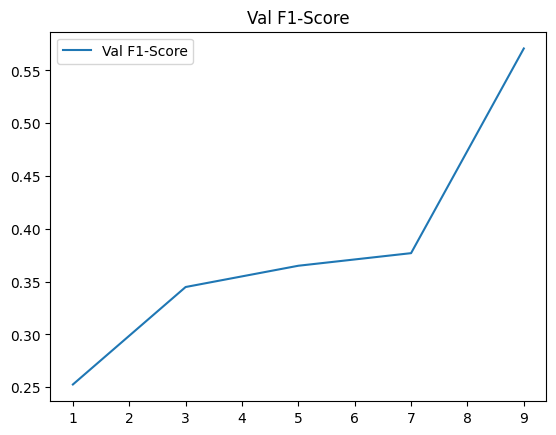

In [105]:
trainloss = trainHistoryDF[~trainHistoryDF["eval_f1-score"].isnull()]
plt.plot(trainloss["eval_f1-score"], label="Val F1-Score")
plt.title("Val F1-Score")
plt.legend()
plt.show()

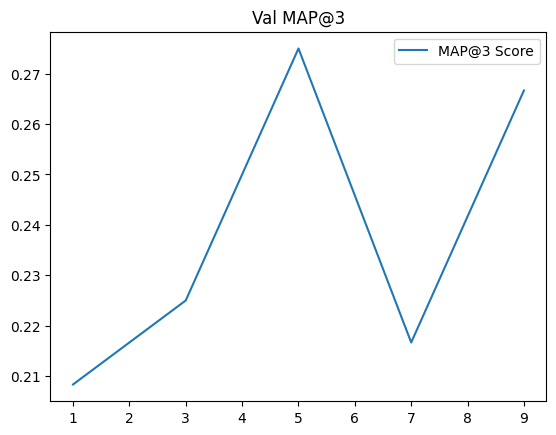

In [106]:
trainloss = trainHistoryDF[~trainHistoryDF["eval_map@3"].isnull()]
plt.plot(trainloss["eval_map@3"], label="MAP@3 Score")
plt.title("Val MAP@3")
plt.legend()
plt.show()

In [107]:
def testValDataset(ds, maxNumData=10):
    for i, data in enumerate(ds):
        print(f"Data {i}")
        newPrompt = data["LLM_Content"]
        with torch.no_grad():
             inputIds = tokenizer(newPrompt, return_tensors="pt").to(device)
             logits = model(**inputIds).logits
             probabilities = nn.functional.softmax(logits, dim=-1) # get probilitity
             classID =logits.argmax().item()
             print(f"Class ID type {type(classID)}")
             classTxt = le.inverse_transform([classID])[0]
             actualClassID = data['labels']
             actualClass = le.inverse_transform([actualClassID])[0]

        print(f"Query: {newPrompt}\n\rPredict Class ID: {classID}\n\r Predict Text: {classTxt} \n\rActual Class ID: {actualClassID}\n\rActual Class Text: {actualClass}")
        print("-"*30)


In [108]:
testValDataset(datasetDict["val"], 3)

Data 0
Class ID type <class 'int'>
Query: Question: Which number is the greatest?
Answer: \( 6 \)
Correct: False
Student Explanation: because it is the only whole number.
Predict Class ID: 36
 Predict Text: False_Neither:NA 
Actual Class ID: 31
Actual Class Text: False_Misconception:Whole_numbers_larger
------------------------------
Data 1
Class ID type <class 'int'>
Query: Question: This is part of a regular polygon. How many sides does it have? [Image: A diagram showing an obtuse angle labelled 144 degrees]
Answer: \( 6 \)
Correct: False
Student Explanation: if you do it in your head or draw it it will not have 10 side since 10 sides would be shorter than 144.
Predict Class ID: 37
 Predict Text: True_Correct:NA 
Actual Class ID: 36
Actual Class Text: False_Neither:NA
------------------------------
Data 2
Class ID type <class 'int'>
Query: Question: A box contains \( 120 \) counters. The counters are red or blue. \( \frac{3}{5} \) of the counters are red.
How many red counters are th

In [109]:
submitDict

DatasetDict({
    test: Dataset({
        features: ['row_id', 'Category:Misconception'],
        num_rows: 3
    })
})

# Final Prediction

In [110]:
def predictTestDataset(ds):
    result = []
    idx = []
    for i, data in enumerate(ds):
        print(f"Data {i}")
        rowId= data["row_id"]
        newPrompt = data["LLM_Content"]
        with torch.no_grad():
             inputIds = tokenizer(newPrompt, return_tensors="pt").to(device)
             logits = model(**inputIds).logits
             probabilities = nn.functional.softmax(logits, dim=-1) # get probilitity
             top3_preds = np.argsort(logits.cpu(), axis=-1)[:, -3:]
             top3 = top3_preds.flatten() # convert to 1D 
             classTxtArray = le.inverse_transform(top3) # convert class ID to Label 
             top3_labels    = classTxtArray.reshape(top3.shape)
             temp = ""
             # for preds in top3_labels:
             temp += temp + " ".join(top3_labels)
             # result.append(temp)
             # print((top3.shape))
             result.append(temp[:-1])
             idx.append(rowId)

        print(f"RowID: {rowId}\n\rQuery: {newPrompt}\n\rPredict Top3 Class ID : {top3}\n\rClass Text : {temp}")
        print("-"*30)
    return idx, result


In [111]:
rowID ,predictResult = predictTestDataset(testDict["test"])
final =  pd.DataFrame({"row_id": rowID, "Category:Misconception": predictResult})
final

Data 0
RowID: 36696
Query: Question: What fraction of the shape is not shaded? Give your answer in its simplest form. [Image: A triangle split into 9 equal smaller triangles. 6 of them are shaded.]
Answer: \( \frac{1}{3} \)
Correct: True
Student Explanation: I think that 1/3 is the answer, as it's the simplest form of 3/9.
Predict Top3 Class ID : tensor([34, 64, 37])
Class Text : False_Misconception:Wrong_fraction True_Neither:NA True_Correct:NA
------------------------------
Data 1
RowID: 36697
Query: Question: What fraction of the shape is not shaded? Give your answer in its simplest form. [Image: A triangle split into 9 equal smaller triangles. 6 of them are shaded.]
Answer: \( \frac{3}{6} \)
Correct: False
Student Explanation: i think this answer is because 3 triangles are white and 6 triangle are blue.
Predict Top3 Class ID : tensor([37,  2, 64])
Class Text : True_Correct:NA False_Misconception:Adding_terms True_Neither:NA
------------------------------
Data 2
RowID: 36698
Query: 

,row_id,Category:Misconception
0,36696,False_Misconception:Wrong_fraction True_Neithe...
1,36697,True_Correct:NA False_Misconception:Adding_ter...
2,36698,False_Neither:NA True_Neither:NA True_Correct:N


In [112]:
predictResult


['False_Misconception:Wrong_fraction True_Neither:NA True_Correct:N',
 'True_Correct:NA False_Misconception:Adding_terms True_Neither:N',
 'False_Neither:NA True_Neither:NA True_Correct:N']

In [113]:
final.to_csv('submission.csv', index = False)

In [114]:
pd.read_csv('submission.csv')

,row_id,Category:Misconception
0,36696,False_Misconception:Wrong_fraction True_Neithe...
1,36697,True_Correct:NA False_Misconception:Adding_ter...
2,36698,False_Neither:NA True_Neither:NA True_Correct:N
